In [1]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/nasa-data/chalakudi(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M
0,1984,2,29,4.32,27.01,0.44,99.99,2.48,14.34
1,1984,3,1,5.84,28.33,0.13,100.07,3.00,13.73
2,1984,3,2,3.46,28.82,0.07,100.02,4.25,12.21
3,1984,3,3,4.12,28.79,1.35,100.02,4.18,13.37
4,1984,3,4,2.87,28.28,4.04,100.02,3.06,15.01
...,...,...,...,...,...,...,...,...,...
14240,2023,2,24,6.64,30.55,0.01,100.11,2.74,12.33
14241,2023,2,25,6.79,30.49,0.01,100.23,3.49,11.41
14242,2023,2,26,6.95,29.70,0.07,100.30,4.62,9.28
14243,2023,2,27,6.89,29.40,0.02,100.31,4.46,9.09


In [2]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
df1

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,datetime
0,4.32,27.01,0.44,99.99,2.48,14.34,29/02/1984
1,5.84,28.33,0.13,100.07,3.00,13.73,01/03/1984
2,3.46,28.82,0.07,100.02,4.25,12.21,02/03/1984
3,4.12,28.79,1.35,100.02,4.18,13.37,03/03/1984
4,2.87,28.28,4.04,100.02,3.06,15.01,04/03/1984
...,...,...,...,...,...,...,...
14240,6.64,30.55,0.01,100.11,2.74,12.33,24/02/2023
14241,6.79,30.49,0.01,100.23,3.49,11.41,25/02/2023
14242,6.95,29.70,0.07,100.30,4.62,9.28,26/02/2023
14243,6.89,29.40,0.02,100.31,4.46,9.09,27/02/2023


In [3]:
df2 = pd.read_csv('/kaggle/input/gage-height/Chalakudy_Gauge-Discharge_Data_Arangaly1978-20171 (1).csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,17/2/1978,1.360,NaN
1,18/2/1978,1.350,NaN
2,19/2/1978,1.355,NaN
3,20/2/1978,1.350,NaN
4,21/2/1978,1.350,NaN
...,...,...,...
14344,27/5/2017,1.230,28.259
14345,28/5/2017,1.150,NaN
14346,29/5/2017,1.200,14.745
14347,30/5/2017,1.250,29.122


In [4]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')
# df = df.drop(['PS', 'WS10M_RANGE'], axis=1)

In [5]:
df

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-02-29,4.32,27.01,0.44,99.99,2.48,14.34,1.090,7.800
1984-03-01,5.84,28.33,0.13,100.07,3.00,13.73,1.095,8.100
1984-03-02,3.46,28.82,0.07,100.02,4.25,12.21,1.070,7.200
1984-03-03,4.12,28.79,1.35,100.02,4.18,13.37,1.075,7.800
1984-03-04,2.87,28.28,4.04,100.02,3.06,15.01,1.100,9.300
...,...,...,...,...,...,...,...,...
2017-05-27,4.91,27.68,4.97,99.66,2.84,20.26,1.230,28.259
2017-05-28,3.96,27.43,16.36,99.70,2.84,20.51,1.150,NaN
2017-05-29,3.44,28.03,12.87,99.67,4.00,20.14,1.200,14.745


In [6]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [7]:
min(df['Discharge (cumecs)'])

0.0

In [8]:
max(df['Discharge (cumecs)'])

1362.742

In [9]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
QV2M                    0
Mean Gauge (m)          0
Discharge (cumecs)    166
dtype: int64

In [10]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear')

In [11]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
QV2M                  0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

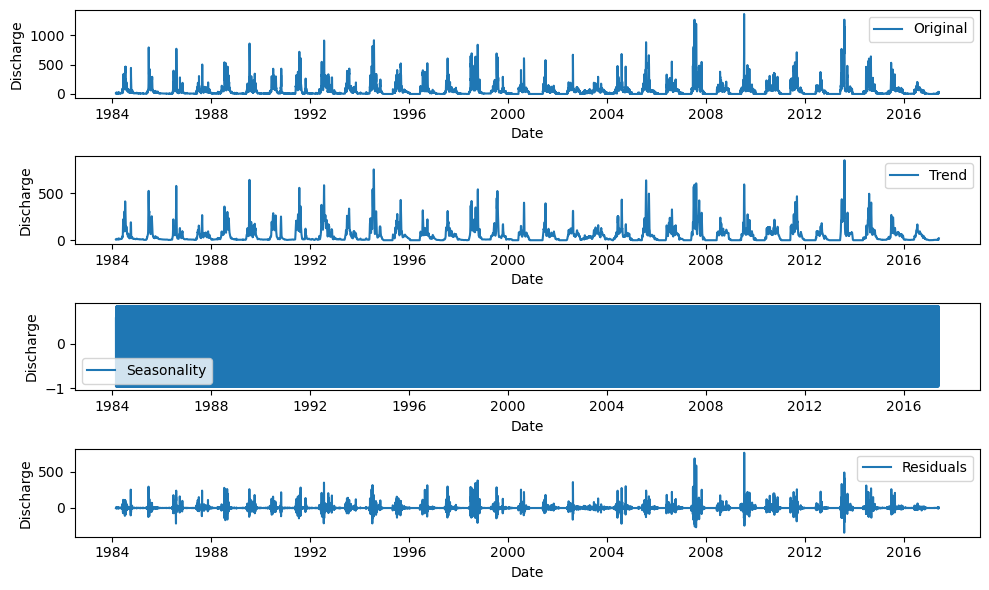

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonality,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.tight_layout()

plt.show()

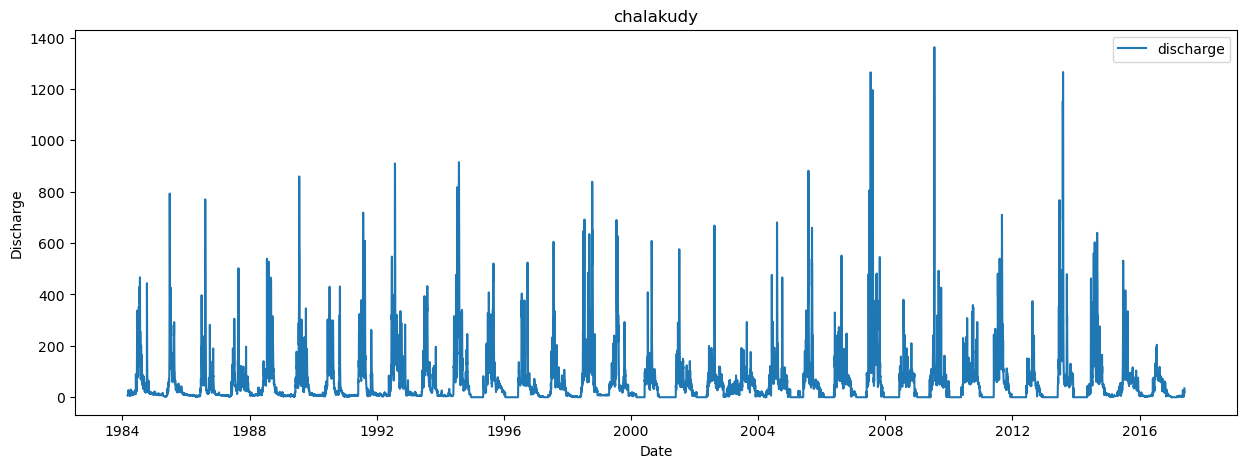

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("chalakudy")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [14]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.513288,-0.559541,0.220604,0.090812,-0.359635,-0.403920,-0.429089
TS,0.513288,1.000000,-0.295708,-0.018645,0.302075,-0.188862,-0.397776,-0.417797
PRECTOTCORR,-0.559541,-0.295708,1.000000,-0.342444,-0.088416,0.392932,0.425827,0.449677
PS,0.220604,-0.018645,-0.342444,1.000000,0.135023,-0.574778,-0.185988,-0.189733
WS10M_RANGE,0.090812,0.302075,-0.088416,0.135023,1.000000,-0.354556,-0.049960,-0.070804
QV2M,-0.359635,-0.188862,0.392932,-0.574778,-0.354556,1.000000,0.280488,0.314220
Mean Gauge (m),-0.403920,-0.397776,0.425827,-0.185988,-0.049960,0.280488,1.000000,0.903532
Discharge (cumecs),-0.429089,-0.417797,0.449677,-0.189733,-0.070804,0.314220,0.903532,1.000000


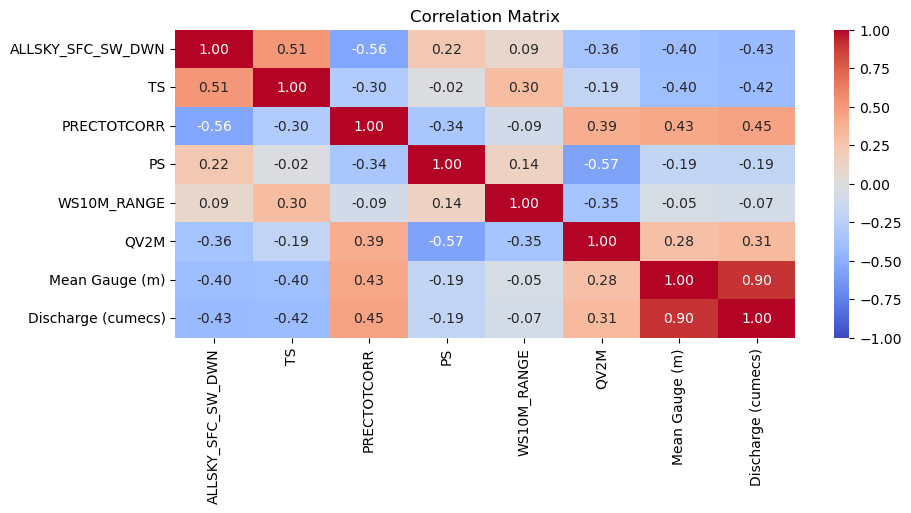

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [16]:
df

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-02-29,4.32,27.01,0.44,99.99,2.48,14.34,1.090,7.800
1984-03-01,5.84,28.33,0.13,100.07,3.00,13.73,1.095,8.100
1984-03-02,3.46,28.82,0.07,100.02,4.25,12.21,1.070,7.200
1984-03-03,4.12,28.79,1.35,100.02,4.18,13.37,1.075,7.800
1984-03-04,2.87,28.28,4.04,100.02,3.06,15.01,1.100,9.300
...,...,...,...,...,...,...,...,...
2017-05-27,4.91,27.68,4.97,99.66,2.84,20.26,1.230,28.259
2017-05-28,3.96,27.43,16.36,99.70,2.84,20.51,1.150,21.502
2017-05-29,3.44,28.03,12.87,99.67,4.00,20.14,1.200,14.745


In [17]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-02-29,4.32,27.01,0.44,99.99,2.48,14.34,1.090,7.8
1984-03-01,5.84,28.33,0.13,100.07,3.00,13.73,1.095,8.1
1984-03-02,3.46,28.82,0.07,100.02,4.25,12.21,1.070,7.2
1984-03-03,4.12,28.79,1.35,100.02,4.18,13.37,1.075,7.8
1984-03-04,2.87,28.28,4.04,100.02,3.06,15.01,1.100,9.3
...,...,...,...,...,...,...,...,...
2010-01-05,5.49,26.50,0.00,99.94,2.64,13.98,0.780,14.3
2010-01-06,5.20,26.55,0.00,99.93,3.92,13.18,0.750,0.0
2010-01-07,5.28,27.04,0.00,100.02,3.88,14.47,0.740,0.0


In [18]:
test

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-01-10,3.25,28.20,1.00,100.08,3.05,16.60,0.66,0.000
2010-01-11,5.35,28.73,0.19,100.20,2.71,15.69,0.67,0.000
2010-01-12,5.11,28.26,6.14,100.30,4.08,16.97,0.75,0.000
2010-01-13,4.72,27.72,2.61,100.32,2.66,17.64,0.78,0.000
2010-01-14,4.92,28.77,0.41,100.29,3.38,16.60,0.69,0.000
...,...,...,...,...,...,...,...,...
2017-05-27,4.91,27.68,4.97,99.66,2.84,20.26,1.23,28.259
2017-05-28,3.96,27.43,16.36,99.70,2.84,20.51,1.15,21.502
2017-05-29,3.44,28.03,12.87,99.67,4.00,20.14,1.20,14.745


In [19]:
x=test.index[0]
y=train.index[-1]
z=test.index

In [20]:
x,y

(Timestamp('2010-01-10 00:00:00', freq='D'),
 Timestamp('2010-01-09 00:00:00', freq='D'))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [22]:
train =scaler.transform(train)
train

array([[5.33248082e-01, 3.80523732e-01, 2.50042621e-03, ...,
        5.25120440e-01, 1.43799472e-01, 5.72375402e-03],
       [7.27621483e-01, 4.88543372e-01, 7.38762289e-04, ...,
        4.83138334e-01, 1.44459103e-01, 5.94389840e-03],
       [4.23273657e-01, 5.28641571e-01, 3.97795079e-04, ...,
        3.78527185e-01, 1.41160950e-01, 5.28346525e-03],
       ...,
       [6.56010230e-01, 3.82978723e-01, 0.00000000e+00, ...,
        5.34067447e-01, 9.76253298e-02, 0.00000000e+00],
       [6.22762148e-01, 4.24713584e-01, 0.00000000e+00, ...,
        5.42326222e-01, 9.89445910e-02, 0.00000000e+00],
       [6.07416880e-01, 4.91816694e-01, 1.59118031e-03, ...,
        6.76531315e-01, 1.06860158e-01, 0.00000000e+00]])

In [23]:
test=scaler.transform(test)
test

array([[0.39641944, 0.47790507, 0.00568279, ..., 0.6806607 , 0.08707124,
        0.        ],
       [0.66496164, 0.5212766 , 0.00107973, ..., 0.61803166, 0.0883905 ,
        0.        ],
       [0.6342711 , 0.48281506, 0.03489231, ..., 0.70612526, 0.09894459,
        0.        ],
       ...,
       [0.42071611, 0.46399345, 0.07313747, ..., 0.92429456, 0.15831135,
        0.0108201 ],
       [0.54731458, 0.47135843, 0.11638347, ..., 0.97453544, 0.16490765,
        0.02137015],
       [0.66496164, 0.41653028, 0.17054043, ..., 0.95388851, 0.18073879,
        0.02522414]])

In [24]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [25]:
trainx.shape

(9431, 14, 8)

In [26]:
trainy.shape

(9431, 3)

In [27]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [28]:
model1 = Sequential()
model1.add(GRU(units=256,activation='relu',return_sequences=True,input_shape=(n_past,8)))
model1.add(GRU(units=256,activation='relu',return_sequences=True))
model1.add(GRU(units=256,activation='relu',return_sequences=False))
# model1.add(LSTM(units=128,activation='relu',return_sequences=False))
# model1.add(LSTM(units=128,activation='relu',return_sequences=False))
# model1.add(LSTM(units=128,activation='relu',return_sequences=False))
# model1.add(LSTM(units=64,activation='relu'))
model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [29]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 256)           204288    
                                                                 
 gru_1 (GRU)                 (None, 14, 256)           394752    
                                                                 
 gru_2 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 994,563
Trainable params: 994,563
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.fit(trainx, trainy, epochs=250, batch_size=8000, validation_split=0.2, verbose=1)


Epoch 1/250
1/1 [==============================] - 8s 8s/step - loss: 0.0064 - val_loss: 0.0094
Epoch 2/250
1/1 [==============================] - 0s 279ms/step - loss: 0.0064 - val_loss: 0.0082
Epoch 3/250
1/1 [==============================] - 0s 275ms/step - loss: 0.0054 - val_loss: 0.0078
Epoch 4/250
1/1 [==============================] - 0s 265ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 5/250
1/1 [==============================] - 0s 270ms/step - loss: 0.0047 - val_loss: 0.0071
Epoch 6/250
1/1 [==============================] - 0s 264ms/step - loss: 0.0045 - val_loss: 0.0066
Epoch 7/250
1/1 [==============================] - 0s 282ms/step - loss: 0.0041 - val_loss: 0.0063
Epoch 8/250
1/1 [==============================] - 0s 274ms/step - loss: 0.0040 - val_loss: 0.0061
Epoch 9/250
1/1 [==============================] - 0s 274ms/step - loss: 0.0038 - val_loss: 0.0060
Epoch 10/250
1/1 [==============================] - 0s 264ms/step - loss: 0.0037 - val_loss: 0.0058
Epoch 11/250

In [31]:
asd=model1.predict(trainx)

295/295 [==============================] - 4s 11ms/step


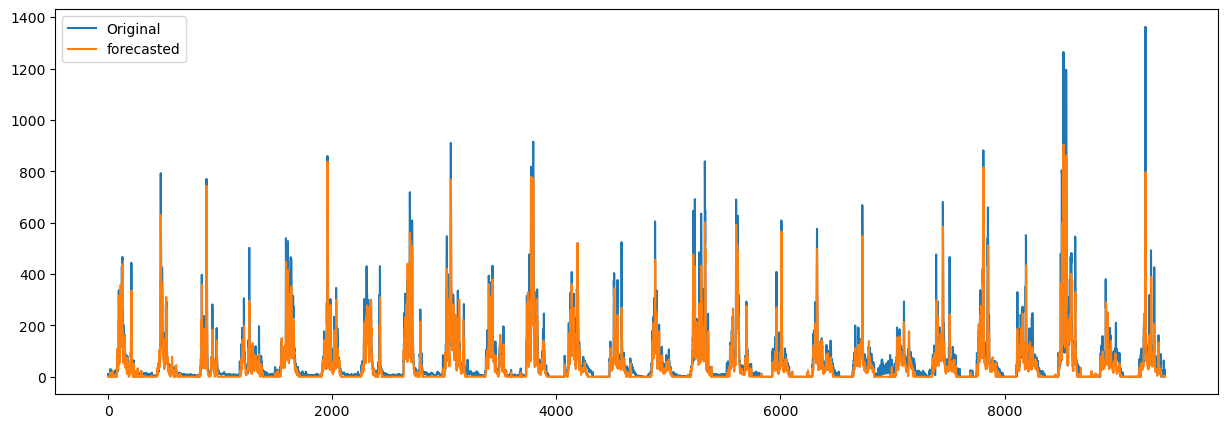

RMSE: 40.83820274514918
R-squared score: 0.83
MAD: 19.32861372951712
MAE score: 19.33


In [32]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

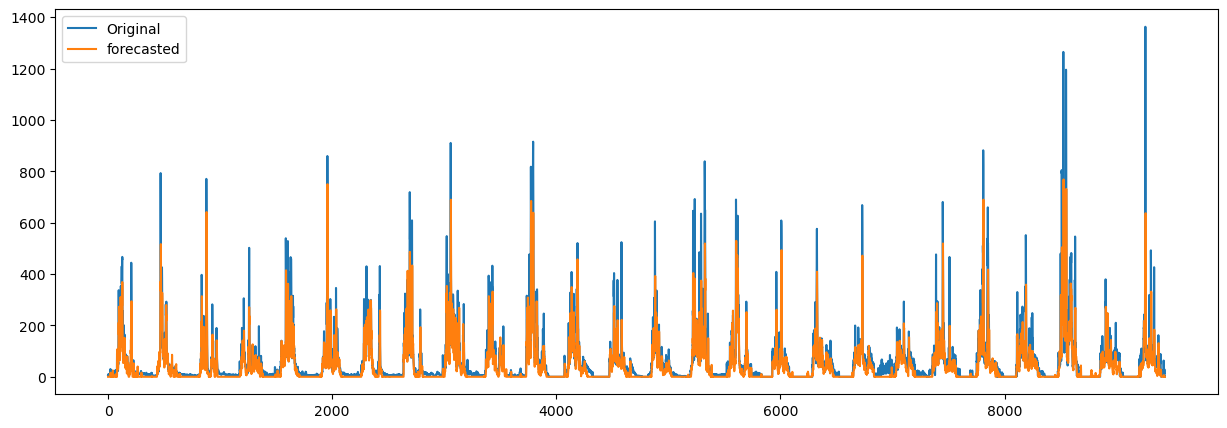

RMSE: 54.52804250965806
R-squared score: 0.69
MAD: 23.397832116990728
MAE score: 23.40


In [33]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

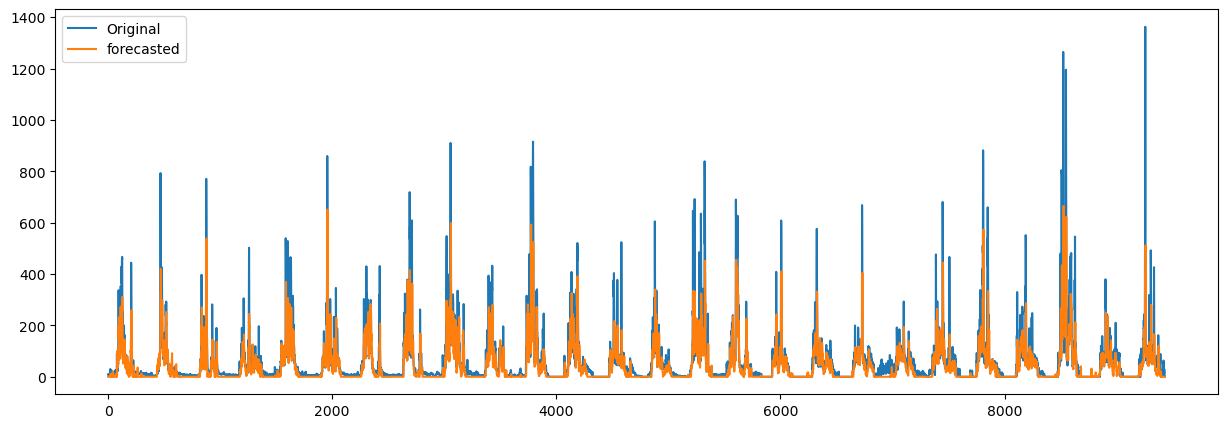

RMSE: 63.52794579023761
R-squared score: 0.58
MAD: 26.73569106461963
MAE score: 26.74


In [34]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [35]:
testx=[]
testy=[]
n_future=3
n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [36]:
testy

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.02073687, 0.01577848, 0.0108201 ],
       [0.01577848, 0.0108201 , 0.02137015],
       [0.0108201 , 0.02137015, 0.02522414]])

In [37]:
testx.shape

(2683, 14, 8)

In [38]:
testy.shape

(2683, 3)

In [39]:
fore=model1.predict(testx)

84/84 [==============================] - 1s 9ms/step


In [40]:
fore

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.00692781, 0.00868044, 0.01363124],
       [0.01081166, 0.01264358, 0.01731431],
       [0.01853635, 0.02046337, 0.02506685]], dtype=float32)

In [41]:
first_elements = [[row[0]] for row in fore]
# print(first_elements)
ppprr=np.array(first_elements)
# print(pppr.shape)

In [42]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

In [43]:
first_elements = [[row[7]] for row in test]
# print(first_elements)
ppp=np.array(first_elements)
# print(pppr.shape)

In [44]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2699,)

In [45]:
# disc_org=disc_org[n_past:-2]
# disc_org.shape

In [46]:
min(disc)

0.0

In [47]:
max(disc)

910.6648

In [48]:
min(disc_org)

0.0

In [49]:
max(disc_org)

1266.0

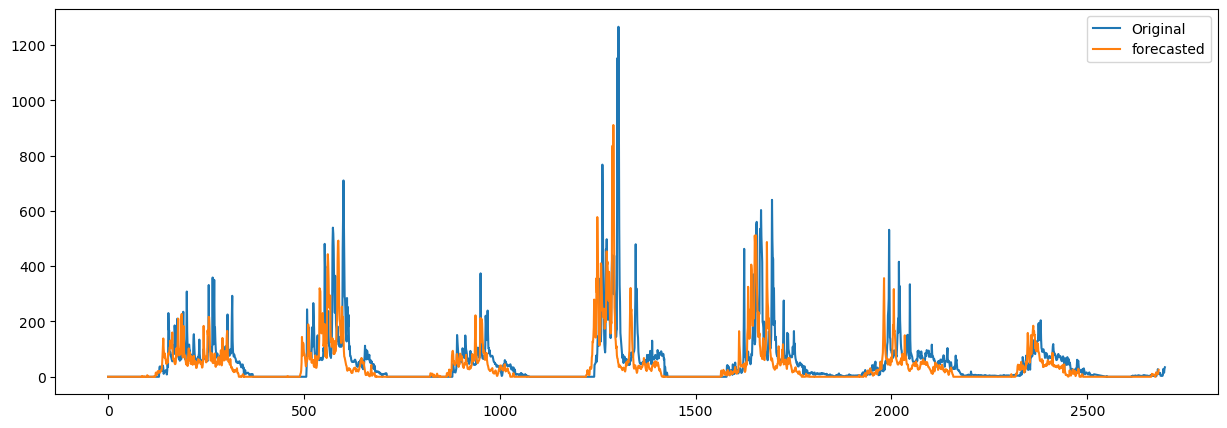

RMSE: 42.008806446129135
R-squared score: 0.79
MAD: 17.241053256425865
MAE score: 17.24


In [50]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org,label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [51]:
len(disc)

2683

In [52]:
# rmse = sqrt(mean_squared_error(ppprr,ppp[n_past:-n_future+1]))
# print("RMSE:",rmse)

In [53]:

forcast_period_dates=pd.date_range(x,periods=len(test),freq='1d').tolist()
forcast_dates=[]
for time in forcast_period_dates:
    forcast_dates.append(time.date())
print(forcast_dates[0])
print(len(forcast_dates))
forcast_dates[-1]

2010-01-10
2699


datetime.date(2017, 5, 31)

In [54]:

dt_forcast = np.column_stack((forcast_dates[n_past:-2], disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'])
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC
dt_forcast = dt_forcast.set_index('Date')

orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2], orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC
dt = dt.set_index('Date')


dt_forcast

,discharge
Date,
2010-01-24,0.0
2010-01-25,0.0
2010-01-26,0.0
2010-01-27,0.0
2010-01-28,0.0
...,...
2017-05-25,11.651673
2017-05-26,12.017791
2017-05-27,9.440819


In [55]:
dt

,discharge
Date,
2010-01-24,0.0
2010-01-25,0.0
2010-01-26,0.0
2010-01-27,0.0
2010-01-28,0.0
...,...
2017-05-25,3.496
2017-05-26,7.043
2017-05-27,28.259


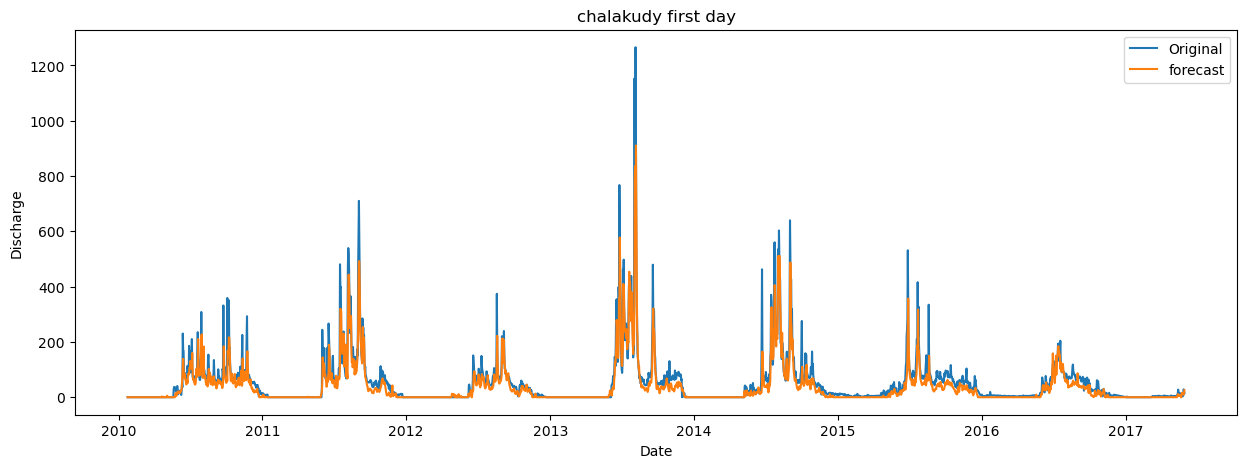

In [56]:
plt.figure(figsize=(15, 5))

plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title("chalakudy first day")
plt.show()
#firstday

In [57]:
dt['discharge'][-10:-1]

Date
2017-05-20     3.602
2017-05-21     3.634
2017-05-22     3.666
2017-05-23     2.972
2017-05-24     3.803
2017-05-25     3.496
2017-05-26     7.043
2017-05-27    28.259
2017-05-28    21.502
Name: discharge, dtype: object

In [58]:
disc_org[-10:-1]

array([ 3.666,  2.972,  3.803,  3.496,  7.043, 28.259, 21.502, 14.745,
       29.122])

In [59]:
dt_forcast['discharge'][:10]

Date
2010-01-24    0.0
2010-01-25    0.0
2010-01-26    0.0
2010-01-27    0.0
2010-01-28    0.0
2010-01-29    0.0
2010-01-30    0.0
2010-01-31    0.0
2010-02-01    0.0
2010-02-02    0.0
Name: discharge, dtype: object

In [60]:
disc[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:
dt_forcast['discharge'][-10:-1]

Date
2017-05-20          0.0
2017-05-21          0.0
2017-05-22    12.813725
2017-05-23    16.262878
2017-05-24     11.94676
2017-05-25    11.651673
2017-05-26    12.017791
2017-05-27     9.440819
2017-05-28      14.7335
Name: discharge, dtype: object

In [62]:
disc[-10:-1]

array([ 0.       ,  0.       , 12.8137245, 16.262878 , 11.94676  ,
       11.651673 , 12.017791 ,  9.440819 , 14.7335   ], dtype=float32)

In [63]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 42.008806446129135
R-squared score: 0.79


In [64]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [65]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

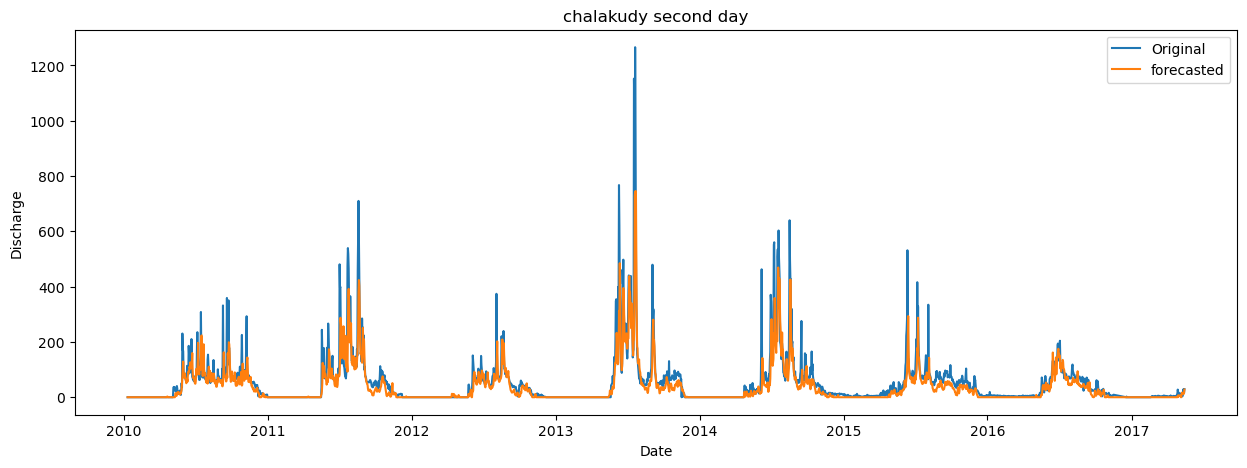

RMSE: 52.14763400567761
R-squared score: 0.68
MAD: 19.692321881638055
MAE score: 19.69


In [66]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+1:-1]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+1:-1],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("chalakudy second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [67]:
third_elements = [[row[2]] for row in fore]
# print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [68]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2683,)

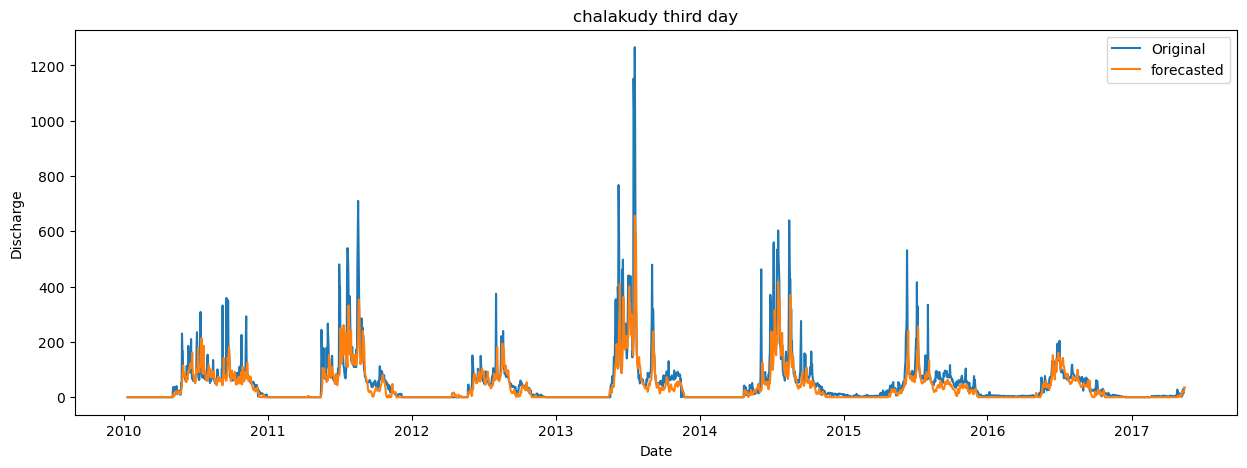

RMSE: 59.26998554950139
R-squared score: 0.59
MAD: 21.988485512215263
MAE score: 21.99


In [69]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+2:len(disc_org)]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("chalakudy third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [70]:
# model1.save('final_chalakudi_gruu.h5')

In [71]:
import pandas as pd

data = [[4.32, 27.01, 0.44, 99.99, 2.48, 14.34, 1.09, 7.8],
        [5.84, 28.33, 0.13, 100.07, 3, 13.73, 1.095, 8.1],
        [3.46, 28.82, 0.07, 100.02, 4.25, 12.21, 1.07, 7.2],
        [4.12, 28.79, 1.35, 100.02, 4.18, 13.37, 1.075, 7.8],
        [2.87, 28.28, 4.04, 100.02, 3.06, 15.01, 1.1, 9.3],
        [3.33, 27.15, 5.12, 99.89, 4.89, 15.81, 1.11, 8.8],
        [1.68, 24.95, 32.67, 99.79, 2.48, 16.66, 1.12, 9.3],
        [1.21, 27.21, 4.51, 99.88, 2.63, 17.82, 1.1, 8.7],
        [4.77, 28.34, 3.02, 99.94, 2.46, 16.91, 1.22, 13.7],
        [6.23, 27.5, 1.89, 99.92, 1.49, 17.03, 1.575, 27.7],
        [6.46, 28.49, 1.55, 99.92, 3.43, 16.91, 1.21, 14.5],
        [5.67, 29.61, 0.17, 99.96, 3.8, 16.85, 1.23, 15.5],
        [6.01, 29.95, 0.14, 99.9, 3.7, 17.46, 1.11, 9.9],
        [6.06, 29.01, 0.19, 99.88, 1.48, 17.64, 1.07, 8.6]]

columns = ['ALLSKY_SFC_SW_DWN', 'TS', 'PRECTOTCORR', 'PS', 'WS10M_RANGE', 'QV2M', 'Mean Gauge (m)', 'Discharge (cumecs)']

dfw = pd.DataFrame(data, columns=columns)


In [72]:
dfw=dfw.iloc[0:14,0:8]
dfw

,ALLSKY_SFC_SW_DWN,TS,PRECTOTCORR,PS,WS10M_RANGE,QV2M,Mean Gauge (m),Discharge (cumecs)
0,4.32,27.01,0.44,99.99,2.48,14.34,1.090,7.8
1,5.84,28.33,0.13,100.07,3.00,13.73,1.095,8.1
2,3.46,28.82,0.07,100.02,4.25,12.21,1.070,7.2
3,4.12,28.79,1.35,100.02,4.18,13.37,1.075,7.8
4,2.87,28.28,4.04,100.02,3.06,15.01,1.100,9.3
5,3.33,27.15,5.12,99.89,4.89,15.81,1.110,8.8
6,1.68,24.95,32.67,99.79,2.48,16.66,1.120,9.3
7,1.21,27.21,4.51,99.88,2.63,17.82,1.100,8.7
8,4.77,28.34,3.02,99.94,2.46,16.91,1.220,13.7
9,6.23,27.50,1.89,99.92,1.49,17.03,1.575,27.7


In [73]:
test1=scaler.transform(dfw)
test1


array([[5.33248082e-01, 3.80523732e-01, 2.50042621e-03, 6.28571429e-01,
        2.84090909e-01, 5.25120440e-01, 1.43799472e-01, 5.72375402e-03],
       [7.27621483e-01, 4.88543372e-01, 7.38762289e-04, 6.85714286e-01,
        3.57954545e-01, 4.83138334e-01, 1.44459103e-01, 5.94389840e-03],
       [4.23273657e-01, 5.28641571e-01, 3.97795079e-04, 6.50000000e-01,
        5.35511364e-01, 3.78527185e-01, 1.41160950e-01, 5.28346525e-03],
       [5.07672634e-01, 5.26186579e-01, 7.67176223e-03, 6.50000000e-01,
        5.25568182e-01, 4.58362010e-01, 1.41820580e-01, 5.72375402e-03],
       [3.47826087e-01, 4.84451718e-01, 2.29584588e-02, 6.50000000e-01,
        3.66477273e-01, 5.71231934e-01, 1.45118734e-01, 6.82447595e-03],
       [4.06649616e-01, 3.91980360e-01, 2.90958686e-02, 5.57142857e-01,
        6.26420455e-01, 6.26290434e-01, 1.46437995e-01, 6.45756864e-03],
       [1.95652174e-01, 2.11947627e-01, 1.85656646e-01, 4.85714286e-01,
        2.84090909e-01, 6.84790089e-01, 1.47757256e-01, 6.

In [74]:
fore=[]
fore.append(test1[0:n_past,0:8])
fore=np.array(fore)
fore

array([[[5.33248082e-01, 3.80523732e-01, 2.50042621e-03, 6.28571429e-01,
         2.84090909e-01, 5.25120440e-01, 1.43799472e-01, 5.72375402e-03],
        [7.27621483e-01, 4.88543372e-01, 7.38762289e-04, 6.85714286e-01,
         3.57954545e-01, 4.83138334e-01, 1.44459103e-01, 5.94389840e-03],
        [4.23273657e-01, 5.28641571e-01, 3.97795079e-04, 6.50000000e-01,
         5.35511364e-01, 3.78527185e-01, 1.41160950e-01, 5.28346525e-03],
        [5.07672634e-01, 5.26186579e-01, 7.67176223e-03, 6.50000000e-01,
         5.25568182e-01, 4.58362010e-01, 1.41820580e-01, 5.72375402e-03],
        [3.47826087e-01, 4.84451718e-01, 2.29584588e-02, 6.50000000e-01,
         3.66477273e-01, 5.71231934e-01, 1.45118734e-01, 6.82447595e-03],
        [4.06649616e-01, 3.91980360e-01, 2.90958686e-02, 5.57142857e-01,
         6.26420455e-01, 6.26290434e-01, 1.46437995e-01, 6.45756864e-03],
        [1.95652174e-01, 2.11947627e-01, 1.85656646e-01, 4.85714286e-01,
         2.84090909e-01, 6.84790089e-01, 1.47

In [75]:
fore=model1.predict(fore)

1/1 [==============================] - 0s 33ms/step


In [76]:
fore

array([[0., 0., 0.]], dtype=float32)

In [77]:
f=[]
fir=[]
x=fore[0][0]
fir.append(x)
f.append(fir)
f

[[0.0]]

In [78]:
import numpy as np
forcast_copies = np.repeat(f, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc

array([0.], dtype=float32)

## 